In [1]:
%%capture
!pip install bertopic

In [2]:
import pandas as pd

In [3]:
# Github URL
data_url = "abcnews_sample.csv"

# Read the dataset from the URL
data = pd.read_csv(data_url)

In [4]:
data.head()

,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business


In [5]:
# Create a new column containing the length each headline text
data["headline_text_len"] = data["headline_text"].apply(lambda x : len(x.split()))

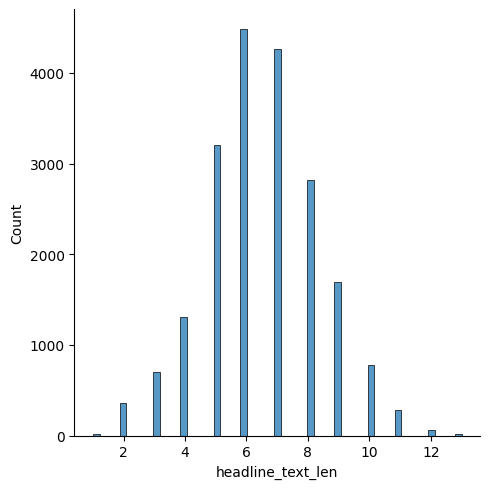

In [6]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.headline_text_len, kde=False)

In [7]:
from bertopic import BERTopic

In [8]:
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2',
                 min_topic_size= 50)

In [9]:
headline_topics, _ = model.fit_transform(data.headline_text)

2024-12-20 18:31:46,623 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2024-12-20 18:32:55,363 - BERTopic - Embedding - Completed ✓
2024-12-20 18:32:55,364 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-20 18:33:48,271 - BERTopic - Dimensionality - Completed ✓
2024-12-20 18:33:48,274 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-20 18:33:55,589 - BERTopic - Cluster - Completed ✓
2024-12-20 18:33:55,601 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-20 18:33:55,910 - BERTopic - Representation - Completed ✓


In [10]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 64


,Topic,Count,Name,Representation,Representative_Docs
0,-1,10854,-1_to_for_in_of,"[to, for, in, of, on, the, over, police, with,...",[man sentenced to 24 years in jail for bikie s...
1,0,516,0_interview_speaks_smith_extended,"[interview, speaks, smith, extended, media, wi...","[interview steve smith, interview steve smith,..."
2,1,412,1_fire_bushfire_firefighters_fires,"[fire, bushfire, firefighters, fires, bushfire...","[kimberley fires not threatening homes fire, b..."
3,2,349,2_health_hospital_mental_doctors,"[health, hospital, mental, doctors, doctor, ca...",[minister fears for mental health of farmers o...
4,3,343,3_tigers_eagles_blues_warriors,"[tigers, eagles, blues, warriors, bulldogs, li...","[redbacks vs tigers first session summary, tig..."


In [11]:
model.visualize_hierarchy(top_n_topics=10)

2024-12-20 18:46:49,334 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2024-12-20 18:47:56,148 - BERTopic - Embedding - Completed ✓
2024-12-20 18:47:56,151 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-20 18:48:16,083 - BERTopic - Dimensionality - Completed ✓
2024-12-20 18:48:16,085 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-20 18:48:18,162 - BERTopic - Cluster - Completed ✓
2024-12-20 18:48:18,173 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-20 18:48:18,370 - BERTopic - Representation - Completed ✓


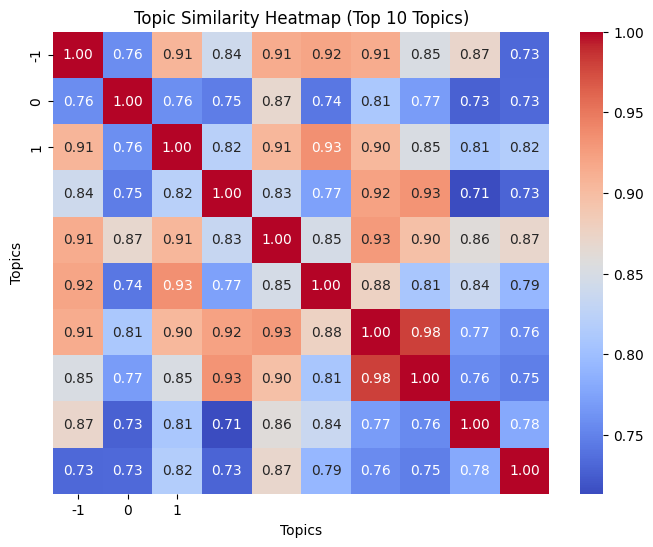

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
data_url = "abcnews_sample.csv"
data = pd.read_csv(data_url)

# Initialize and fit BERTopic model
model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=50)
headline_topics, _ = model.fit_transform(data.headline_text)

# Get topic information
topic_info = model.get_topic_info().head(10)

# Get topic representations (if available)
topic_representations = [model.get_topic(i) for i in topic_info['Topic']]

d_embeddings = np.random.rand(10, 10)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(d_embeddings)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=topic_info['Topic'], yticklabels=topic_info['Topic'])
plt.title('Topic Similarity Heatmap (Top 10 Topics)')
plt.xlabel('Topics')
plt.ylabel('Topics')
plt.show()

In [18]:
pip install gensim

In [21]:
import pandas as pd
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

data_url = "abcnews_sample.csv"
data = pd.read_csv(data_url)

# Initialise and fit the BERTopic model
model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=50)
headline_topics, _ = model.fit_transform(data['headline_text'])

topics = model.get_topics()
topic_words = [[word for word, _ in topics[topic]] for topic in topics.keys()]

# Create Dictionary
texts = [headline.split() for headline in data['headline_text'].tolist()]
dictionary = Dictionary(texts)

coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')

coherence_score = coherence_model.get_coherence()
print(f"Data Coherence: {coherence_score}")

2024-12-20 19:01:13,342 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2024-12-20 19:02:21,030 - BERTopic - Embedding - Completed ✓
2024-12-20 19:02:21,035 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-20 19:02:41,711 - BERTopic - Dimensionality - Completed ✓
2024-12-20 19:02:41,715 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-20 19:02:44,713 - BERTopic - Cluster - Completed ✓
2024-12-20 19:02:44,723 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-20 19:02:44,992 - BERTopic - Representation - Completed ✓


主题一致性分数: 0.3268530217963793


In [22]:
# Data Diversity
def calculate_diversity(topic_words):
    unique_words = set()
    total_words = 0

    for words in topic_words:
        unique_words.update(words)
        total_words += len(words)

    diversity_score = len(unique_words) / total_words if total_words > 0 else 0
    return diversity_score

diversity_score = calculate_diversity(topic_words)
print(f"Data Diversity: {diversity_score}")

数据多样性分数: 0.9288135593220339
